In [34]:
from google.colab import drive
import pandas as pd

# mount google drive
drive.mount('/content/drive')

# load dataset
df = pd.read_csv('/content/drive/MyDrive/New Files/car_sales_data.csv')

# show first rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [35]:
# check missing values
df.isnull().sum()

# drop duplicates
df = df.drop_duplicates()

In [36]:
# convert datatypes
df['Year of manufacture'] = pd.to_numeric(df['Year of manufacture'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


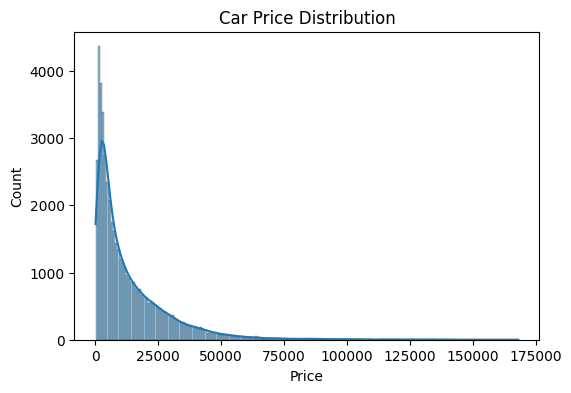

In [30]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Car Price Distribution")
plt.show()


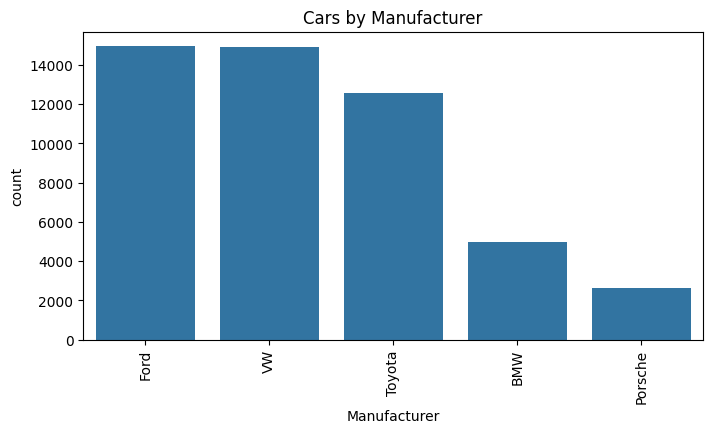

In [37]:
# countplot manufacturers
plt.figure(figsize=(8,4))
sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index)
plt.title("Cars by Manufacturer")
plt.xticks(rotation=90)
plt.show()

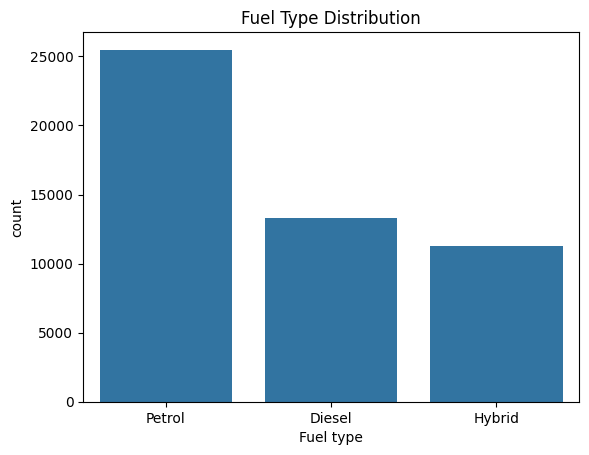

In [32]:

# fuel type distribution
sns.countplot(x='Fuel type', data=df)
plt.title("Fuel Type Distribution")
plt.show()

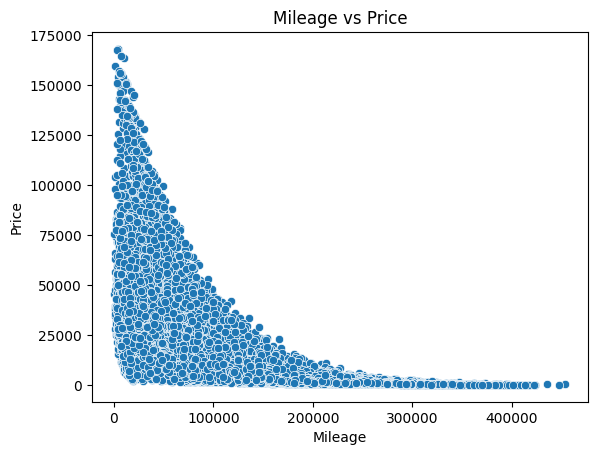

In [38]:
# Step 4: Bivariate Analysis

# mileage vs price
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price")
plt.show()

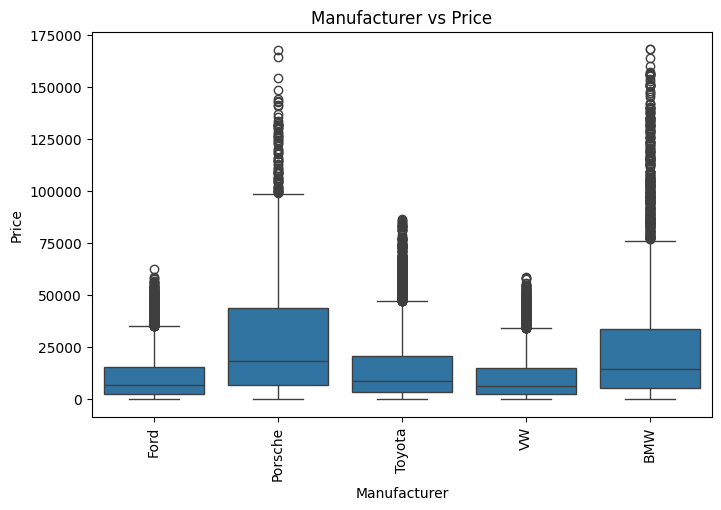

In [39]:
# manufacturer vs price
plt.figure(figsize=(8,5))
sns.boxplot(x='Manufacturer', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Manufacturer vs Price")
plt.show()

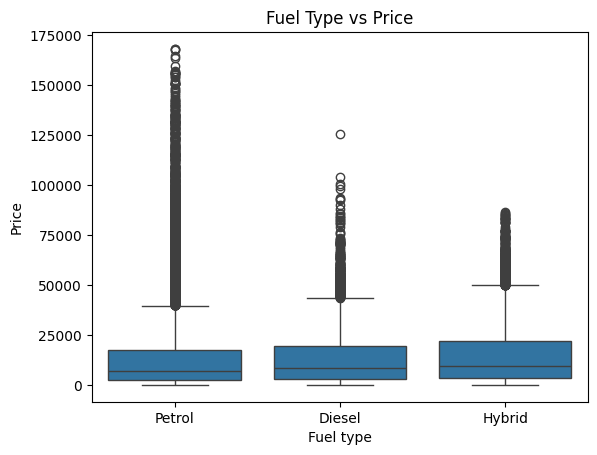

In [40]:
# fuel type vs price
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

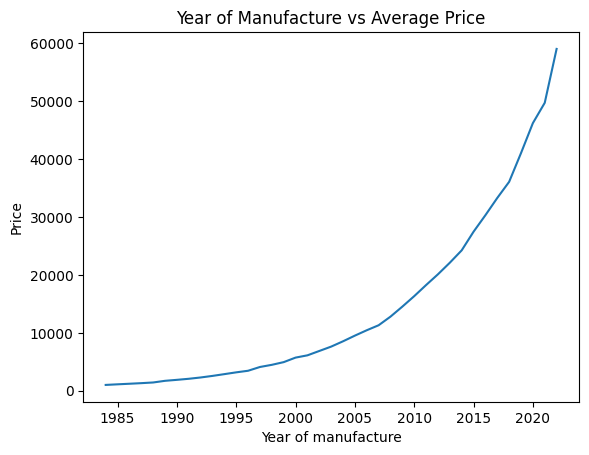

In [41]:
# year vs avg price
avg_price = df.groupby('Year of manufacture')['Price'].mean().reset_index()
sns.lineplot(x='Year of manufacture', y='Price', data=avg_price)
plt.title("Year of Manufacture vs Average Price")
plt.show()

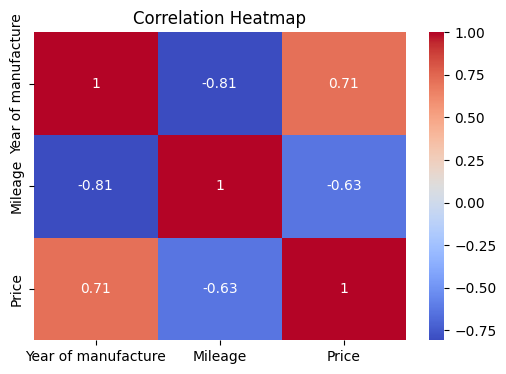

In [45]:
# Step 5: Multivariate Analysis

# correlation heatmap
num_cols = ['Year of manufacture','Mileage','Price']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
# avg price per manufacturer & fuel type
df.groupby(['Manufacturer','Fuel type'])['Price'].mean().sort_values(ascending=False).head(10)


Manufacturer  Fuel type
Porsche       Petrol       29205.111444
              Diesel       28247.090580
BMW           Petrol       26603.381404
              Diesel       18148.220392
Toyota        Hybrid       15329.371990
Ford          Hybrid       12599.549852
              Diesel       12570.310440
VW            Hybrid       12389.113060
              Diesel       11924.005094
Toyota        Petrol       10953.433510
Name: Price, dtype: float64

In [48]:
# Step 6: Simple Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# features and target
X = df[['Year of manufacture','Mileage']].fillna(0)
y = df['Price'].fillna(0)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 128366808.14537029


 Insights & Summary

1. **Newer cars retain higher resale prices**

   * 2022 cars have the highest average resale price (\~59,022).
   * Prices drop steadily as the year gets older: 2021 (\~49,716) → 2020 (\~46,210) → 2019 (\~41,034) → 2018 (\~36,073).
   * This confirms depreciation with car age.

2. **Mileage has a strong negative impact on price**

   * Correlation between `Mileage` and `Price` is **-0.63**.
   * This means the higher the mileage, the lower the resale price.

3. **Depreciation trend is visible**

   * Cars lose about **8k–10k in value per year** between 2018 and 2022.
   * Strong evidence of time-based depreciation.

4. **Manufacturer effect (to be checked in your plots)**

   * Some brands may dominate resale values. Boxplots will show which manufacturers keep higher prices.

5. **Fuel type effect (to be checked in your plots)**

   * Distribution and boxplots will reveal whether Petrol/Diesel/Electric cars sell higher.
   * (Right now, we only confirmed mileage and year trends numerically.)


